In [13]:
%matplotlib inline
%load_ext autoreload
! pip install git+https://github.com/avivajpeyi/pspline_psd.git -q

# Example: LISA White Dwarf background

In [1]:
import numpy as np
import pandas as pd

DATA_URL = "https://gist.githubusercontent.com/avivajpeyi/67c3129ac75e6e9da1f75209de7ec5fe/raw/849ee5a2bee139ac0cdcce10720630d7a668a92d/lisa_wd_strain"

data = np.loadtxt(DATA_URL, delimiter=" ")
# only keep first 5000 points for speed
data = data[:5000]

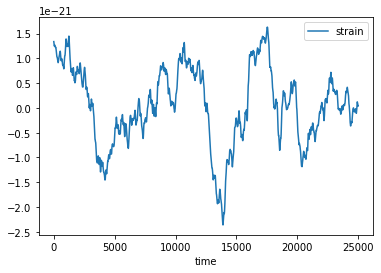

In [2]:
data = pd.DataFrame(data, columns=["strain"])
dt = 5.00000079
data["time"] = np.arange(0, len(data) * dt, dt)
data.plot(x="time", y="strain");

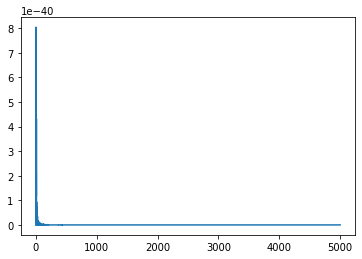

In [3]:
from pspline_psd.fourier_methods import get_periodogram
import matplotlib.pyplot as plt

pdgrm = get_periodogram(timeseries=data.strain.values)
plt.plot(pdgrm)


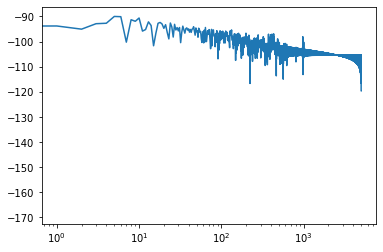

In [5]:
plt.semilogx(np.log(pdgrm))

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Liberation Sans
findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Liberation Sans
findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans' not found because none of the following families were found: Liberation Sans
findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans' not found because none of the following families were found: Liberation Sans
findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans' not found because none of the following families were found: Liberation Sans


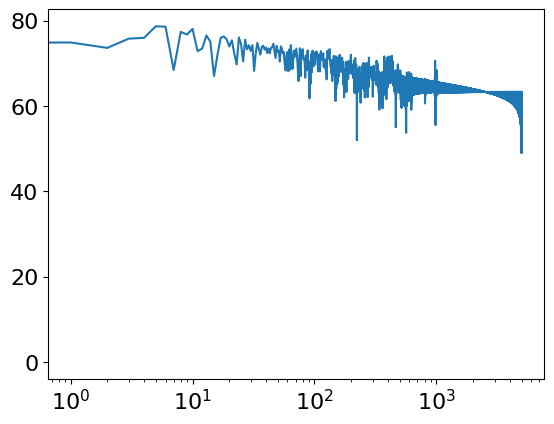

In [7]:
scaled_data = np.log(pdgrm)
scaled_data = scaled_data - np.mean(scaled_data)
scaled_data = scaled_data + np.abs(np.min(scaled_data))
plt.semilogx(scaled_data)



In [12]:
from pspline_psd.sample.spline_model_sampler import sample_with_spline_model



mcmc = sample_with_spline_model(
    data=scaled_data,
    Ntotal=2000,
    burnin=1000,
    degree=3,
    eqSpacedKnots=False,
    compute_psds=True,
)

MCMC sampling:   0%|          | 0/2000 [00:00<?, ?it/s]

Generating Spline posterior:   0%|          | 0/1000 [00:00<?, ?it/s]

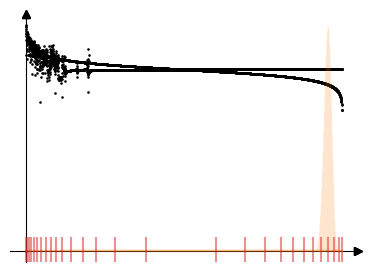

In [13]:
from pspline_psd.plotting.plot_spline_model_and_data import plot_spline_model_and_data

fig = plot_spline_model_and_data(mcmc.data, mcmc.psd_quantiles, knots=mcmc.knots, separarte_y_axis=True)

In [ ]:
# WE NEED A LOG-SPLINE MODEL